<a href="https://colab.research.google.com/github/srikavya26/Credit-Default/blob/main/UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Default Probability**

**Dataset** :
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Default of Credit Card Clients Dataset (UCI Machine Learning Repository)

# Install Required Libraries




In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
%%writefile requirements.txt
# Core Libraries
pandas==1.3.5
numpy==1.21.6
scikit-learn==1.0.2
scipy==1.7.3

# Data Visualization
matplotlib==3.9.2
seaborn==0.13.2

# Imbalanced Data Handling
imbalanced-learn==0.12.3

# Categorical Encoding
category-encoders==2.6.4

# Bayesian Modeling
pymc3==3.11.5
arviz==0.12.1
theano-pymc==1.1.2

# Jupyter / Colab Utilities
tqdm==4.66.5
joblib==1.4.2

Writing requirements.txt


Understanding the Dataset


*   Feautres- X1: LIMIT_BAL, ID , X2: SEX, X3: EDUCATION, X4: MARRIAGE, X5: AGE, X6–X11: PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6- history of payments

*   List item



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import category_encoders as ce

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)
print("Shape:", df.shape)
df.head()


Shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
%%capture
!pip install -r requirements.txt

In [ ]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)
target = 'default'

In [ ]:
print(df.info())
print(df.describe())
print(df[target].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

**EDA**

In [ ]:
missing = df.isnull().sum()
print(missing[missing > 0])

num_cols = df.select_dtypes(include=np.number).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])


Series([], dtype: int64)


In [ ]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

encoder = ce.TargetEncoder(cols=cat_cols)
df[cat_cols] = encoder.fit_transform(df[cat_cols], df[target])


In [ ]:
X = df.drop(columns=[target, 'ID'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


*Smote is to avoid imbalance*

In [ ]:
print("Before SMOTE:", np.bincount(y_train))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print("After SMOTE:", np.bincount(y_res))


Before SMOTE: [18691  5309]
After SMOTE: [18691 18691]




*  Class 0 - not defaulting a loan
*  Class 1 - defaulting a loan




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.7138400769802506
Confusion Matrix:
 [[3178 1495]
 [ 475  852]]
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      4673
         1.0       0.36      0.64      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.62      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000



Trees

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'ID' column exists before attempting to drop it
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

print("\nMissing Values:\n", df.isnull().sum().sum())

print("\nData Types:\n", df.dtypes)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)['default'].sort_values(ascending=False).head(10).to_frame(),
            annot=True, cmap='coolwarm')
plt.title('Top 10 Correlated Features with Default')
plt.show()

KeyError: "['ID'] not found in axis"


Missing Values:
 0

Data Types:
 LIMIT_BAL    float64
SEX          float64
EDUCATION    float64
MARRIAGE     float64
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default      float64
dtype: object


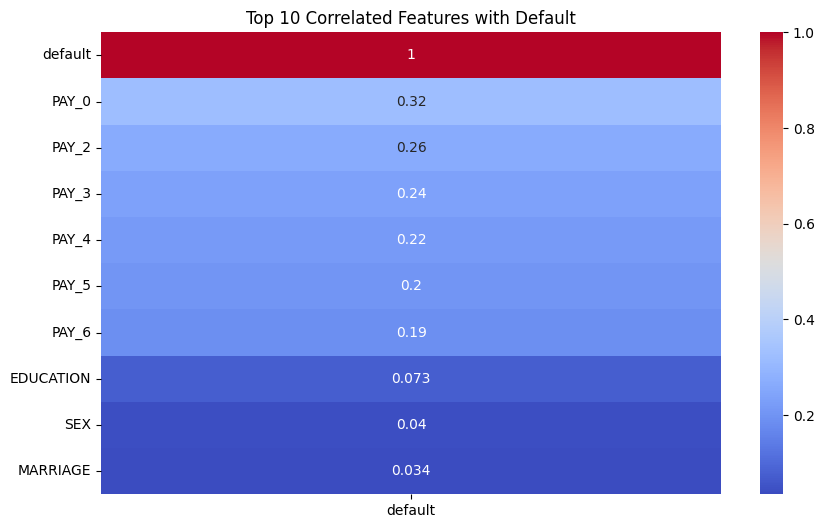

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'ID' column exists before attempting to drop it
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

print("\nMissing Values:\n", df.isnull().sum().sum())

print("\nData Types:\n", df.dtypes)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)['default'].sort_values(ascending=False).head(10).to_frame(),
            annot=True, cmap='coolwarm')
plt.title('Top 10 Correlated Features with Default')
plt.show()

/tmp/ipython-input-2091065842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='Set2')


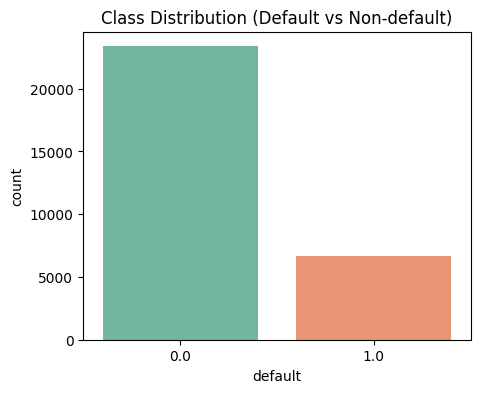


After SMOTE: [18691 18691]


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='default', data=df, palette='Set2')
plt.title('Class Distribution (Default vs Non-default)')
plt.show()

X = df.drop(columns=['default'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE:", np.bincount(y_res))


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

**Decision Tree Classifier**


 DT results
ROC-AUC: 0.7483221849903026
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4673
         1.0       0.58      0.44      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000



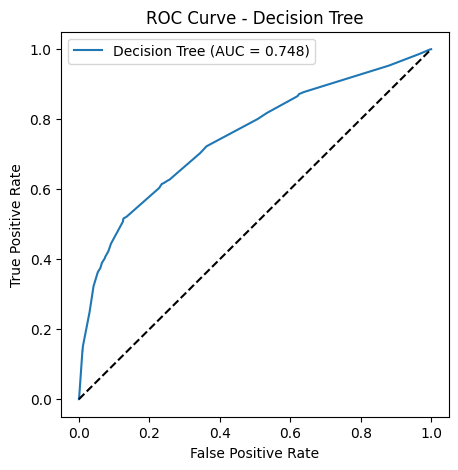

In [ ]:

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_res)
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

print("\n DT results")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
print(classification_report(y_test, y_pred_dt))

fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

In [ ]:
#  Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#smot
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Scale after SMOTE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

print("Shapes after processing:")
print("Train X:", X_train_scaled.shape)
print("Train y:", y_res.shape)
print("Test X:", X_test_scaled.shape)
print("Test y:", y_test.shape)


Shapes after processing:
Train X: (37382, 23)
Train y: (37382,)
Test X: (6000, 23)
Test y: (6000,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt_model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train_scaled, y_res)

y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.6603254502327097
[[3897  776]
 [ 785  542]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      4673
         1.0       0.41      0.41      0.41      1327

    accuracy                           0.74      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.74      0.74      6000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest ROC-AUC: 0.6158016897403691
              precision    recall  f1-score   support

         0.0       0.89      0.02      0.03      4673
         1.0       0.22      0.99      0.36      1327

    accuracy                           0.23      6000
   macro avg       0.56      0.51      0.20      6000
weighted avg       0.74      0.23      0.11      6000



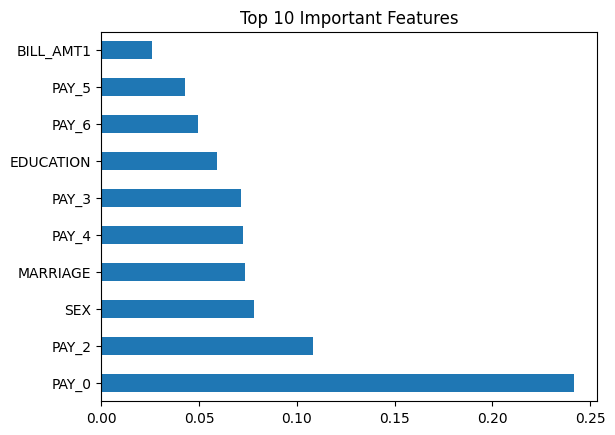

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
import matplotlib.pyplot as plt
import pandas as pd
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.head(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()

Best RF params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
ROC-AUC: 0.7652036236966163
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4673
         1.0       0.64      0.40      0.49      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



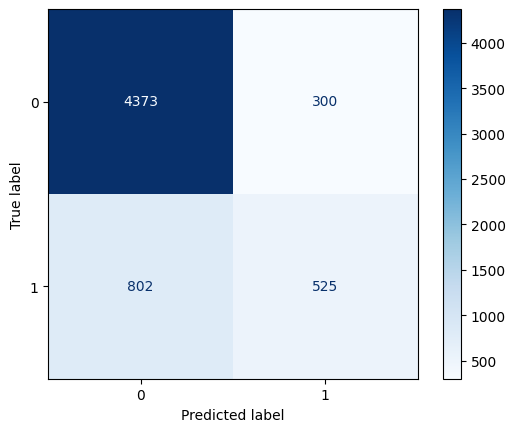

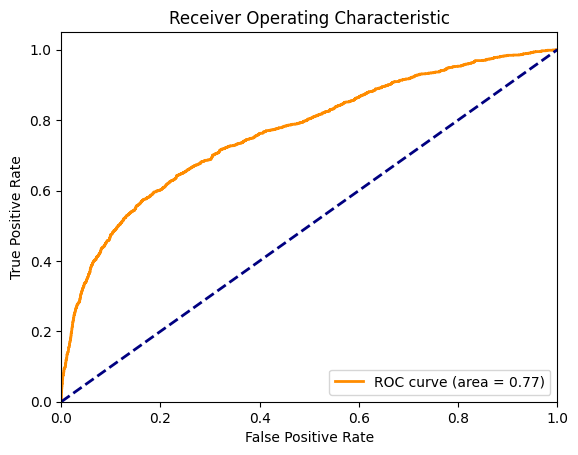

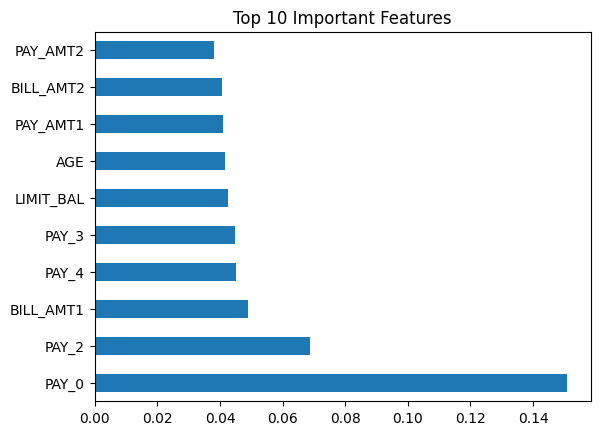

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# --- Split data ---
# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Apply SMOTE with fixed ratio ---
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# --- Random Forest with basic parameter tuning ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, class_weight=None)  # no double weighting
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_res, y_res)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# --- Metrics ---
print("Best RF params:", grid_search.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# --- Feature Importance ---
feat_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.head(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7420 - loss: 0.5594 - val_accuracy: 0.8006 - val_loss: 0.4819
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8139 - loss: 0.4646 - val_accuracy: 0.8050 - val_loss: 0.4717
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8207 - loss: 0.4434 - val_accuracy: 0.8135 - val_loss: 0.4586
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8176 - loss: 0.4450 - val_accuracy: 0.8127 - val_loss: 0.4563
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8211 - loss: 0.4448 - val_accuracy: 0.8131 - val_loss: 0.4542
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8201 - loss: 0.4363 - val_accuracy: 0.8123 - val_loss: 0.4563
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8161 - loss: 0.4410 - val_accuracy: 0.8135 - val_loss: 0.4521
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8168 - loss: 0.4410 - val_accuracy: 0.8133 - val_

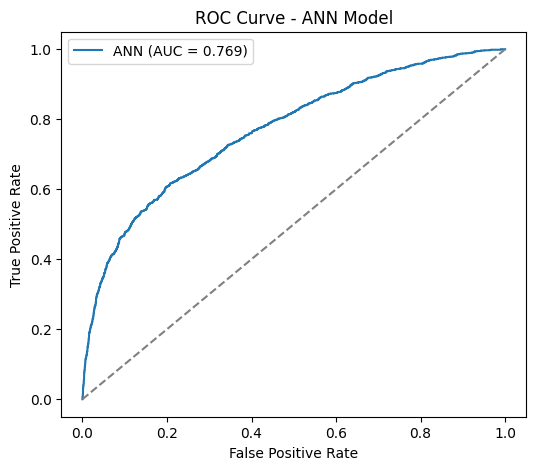

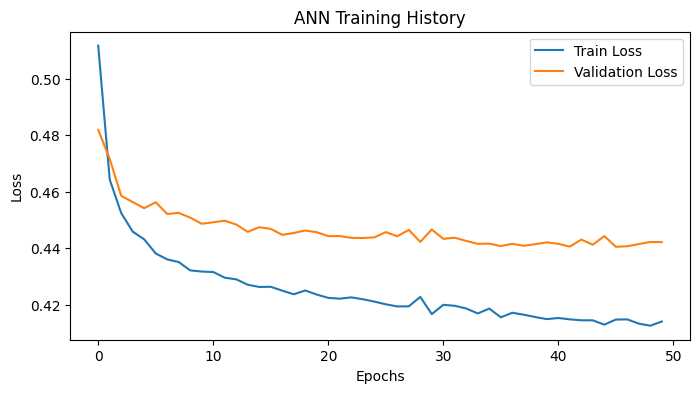

In [ ]:


#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the features if not already done
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output = probability of default
])

ann.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Train the ANN
history = ann.fit(X_train_scaled, y_train,
                  validation_split=0.2,
                  epochs=50,
                  batch_size=128,
                  verbose=1)

# Evaluate
y_pred_ann = ann.predict(X_test_scaled).ravel()
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
brier_ann = brier_score_loss(y_test, y_pred_ann)

print(f"ANN ROC AUC: {roc_auc_ann:.4f}")
print(f"ANN Brier Score: {brier_ann:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ANN (AUC = {roc_auc_ann:.3f})")
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN Model")
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()#
